In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [16]:
data = pd.read_csv(r"C:\Users\Aasna\Downloads\clustering_label.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Frequency,Monetory,kmeans_labels,dbscan_labels,agglo_labels,kmeans_customer_label
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1529,1441,0,22,1617,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,21,15,0,4,27,3,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,734,692,0,20,776,1,0,2,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,48,43,0,6,53,3,0,1,2
4,58293.0,1,0,94,173,43,118,46,27,15,...,1,407,392,0,14,422,0,0,3,1


In [19]:
# Statistical summaries for each cluster
cluster_summary = data.groupby('kmeans_customer_label').agg(['mean', 'median', 'std'])
print(cluster_summary)


                             Income                         Kidhome         \
                               mean   median          std      mean median   
kmeans_customer_label                                                        
0                      41717.602134  41641.0  5475.587551  0.685976    1.0   
1                      61151.684641  61381.0  5398.113518  0.218954    0.0   
2                      23259.449339  24351.5  6787.542159  0.781938    1.0   
3                      79659.111801  78687.0  6824.977638  0.074534    0.0   

                                 Teenhome                     Recency  ...  \
                            std      mean median       std       mean  ...   
kmeans_customer_label                                                  ...   
0                      0.534763  0.646341    1.0  0.541346  49.147866  ...   
1                      0.448055  0.769608    1.0  0.496328  48.637255  ...   
2                      0.477789  0.207048    0.0  0.416379  48.

### Product Category Analysis 

In [17]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_preferences = data.groupby('kmeans_customer_label')[product_columns].mean()


print("Product Preferences per Cluster:")
print(product_preferences)

Product Preferences per Cluster:
                         MntWines  MntFruits  MntMeatProducts  \
kmeans_customer_label                                           
0                      112.298780   7.993902        45.592988   
1                      456.933007  32.446078       179.640523   
2                       17.107930   5.526432        20.799559   
3                      650.134576  63.372671       445.592133   

                       MntFishProducts  MntSweetProducts  MntGoldProds  
kmeans_customer_label                                                   
0                            13.278963          8.253049     26.766768  
1                            43.880719         30.807190     59.550654  
2                             8.011013          5.742291     16.264317  
3                            91.200828         68.204969     74.033126  


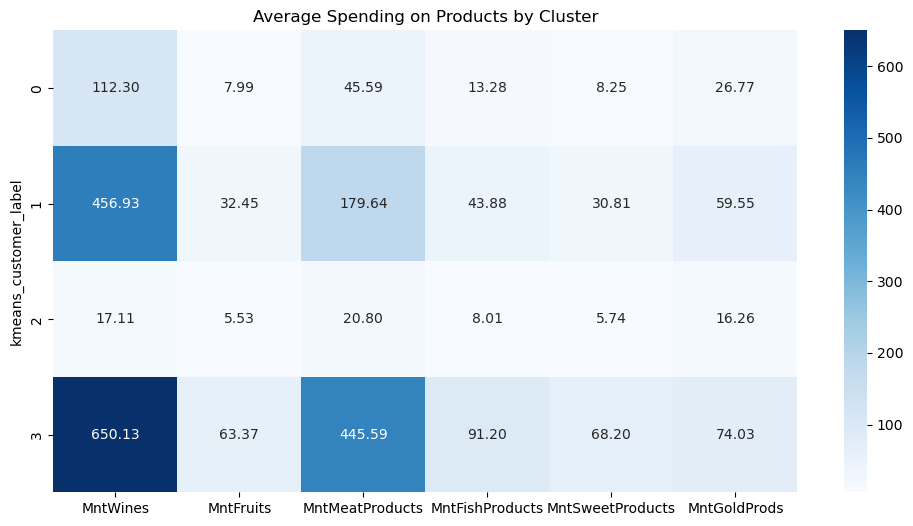

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(product_preferences, annot=True, fmt=".2f", cmap="Blues")
plt.title('Average Spending on Products by Cluster')
plt.show()


Cluster 0: This group appears to be moderate spenders with a notable preference for wines, as indicated by an average spend significantly higher than other categories.
Cluster 1: This segment is a high spender, particularly on wines and meat products, suggesting a premium customer group.
Cluster 2: These customers spend the least across all product categories, indicating they might be low-value or more budget-conscious customers.
Cluster 3: This cluster spends significantly in all product categories, particularly on wines and meat, suggesting they are high-value, affluent customers


### Marketing Channels Analysis

In [18]:
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_responses = data.groupby('kmeans_customer_label')[campaign_columns].mean()

print("\nCampaign Response Rates per Cluster:")
print(campaign_responses)



Campaign Response Rates per Cluster:
                       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
kmeans_customer_label                                                           
0                          0.006098      0.006098      0.085366      0.033537   
1                          0.032680      0.017974      0.045752      0.112745   
2                          0.000000      0.000000      0.079295      0.002203   
3                          0.244306      0.031056      0.089027      0.149068   

                       AcceptedCmp5  
kmeans_customer_label                
0                          0.000000  
1                          0.021242  
2                          0.000000  
3                          0.306418  


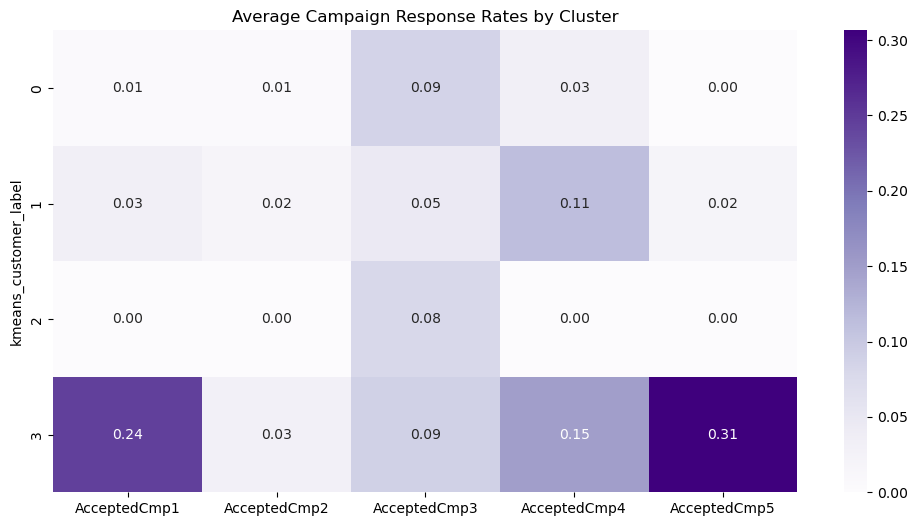

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(campaign_responses, annot=True, fmt=".2f", cmap="Purples")
plt.title('Average Campaign Response Rates by Cluster')
plt.show()

Cluster 3: Has the highest response rates to campaigns, particularly campaigns 1, 4, and 5, suggesting they are more engaged or receptive to marketing efforts.
Clusters 0 and 1: Have moderate response rates, with cluster 1 showing a particular interest in campaign 4.
Cluster 2: Shows very low engagement with marketing campaigns, suggesting they might be difficult to reach or uninterested in promotions.

### Customer Distribution Across Clusters 

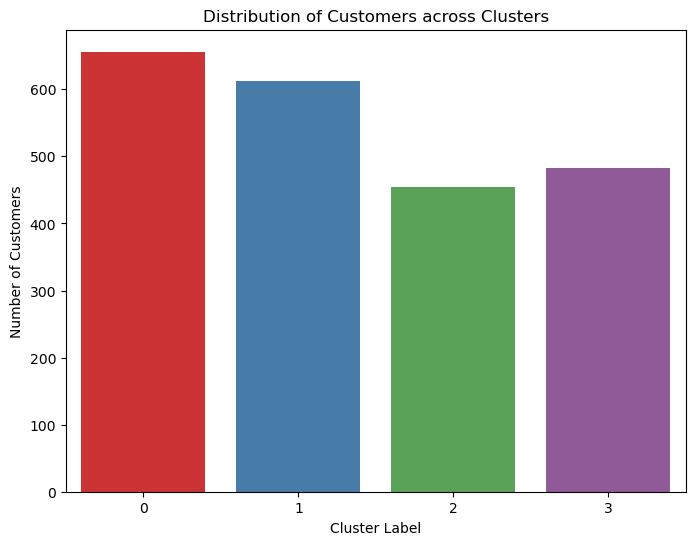

In [15]:
cluster_counts = data['kmeans_customer_label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set1')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers across Clusters')
plt.show()


Customer Distribution: The distribution of customers across clusters is fairly balanced, with no single cluster dominating. This suggests a diverse customer base.

### RFM Analysis

In [7]:
rfm_table = data.groupby('kmeans_customer_label').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory': ['mean', 'count']})
print(rfm_table)

                         Recency  Frequency     Monetory      
                            mean       mean         mean count
kmeans_customer_label                                         
0                      49.147866   8.381098   214.184451   656
1                      48.637255  17.001634   803.258170   612
2                      48.511013   5.288546    73.451542   454
3                      49.759834  19.486542  1392.538302   483


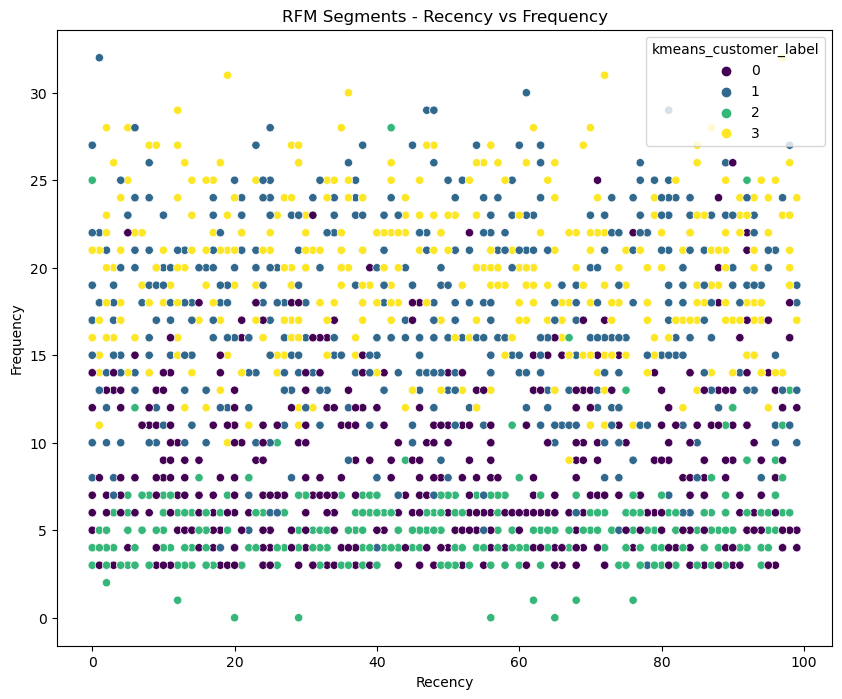

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='kmeans_customer_label', data=data, palette='viridis')
plt.title('RFM Segments - Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

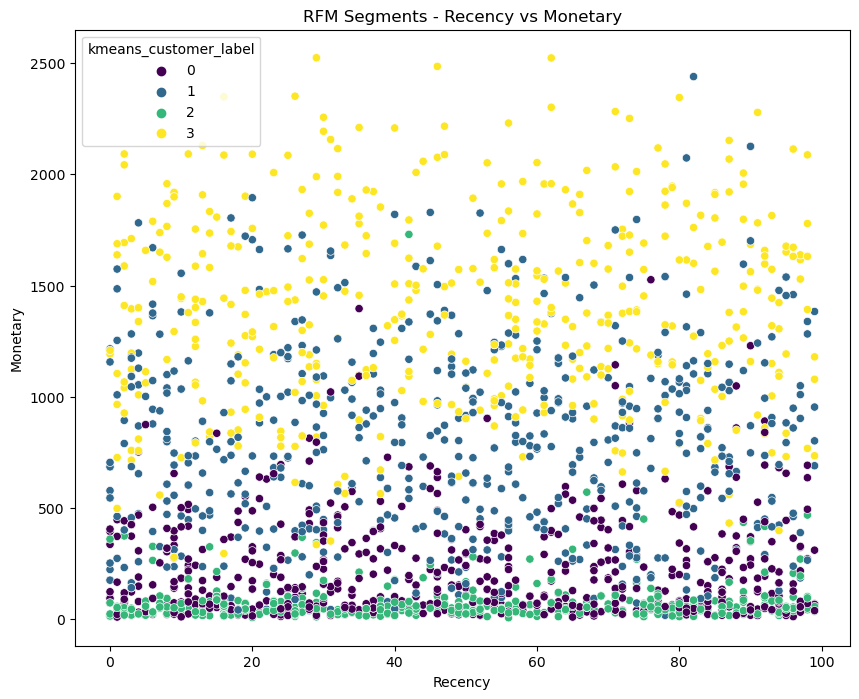

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Monetory', hue='kmeans_customer_label', data=data, palette='viridis')
plt.title('RFM Segments - Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

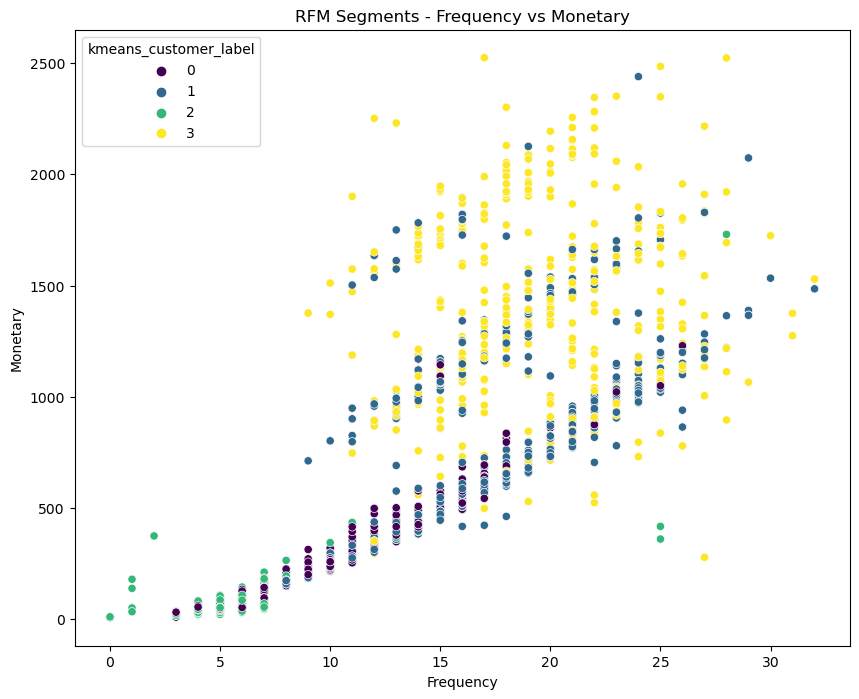

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Frequency', y='Monetory', hue='kmeans_customer_label', data=data, palette='viridis')
plt.title('RFM Segments - Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()


RFM Analysis:

Recency vs Frequency: Clusters show different patterns; for example, cluster 3 might be frequent buyers who have recently made purchases, indicating loyal or active customers.

Recency vs Monetary: Cluster 3 stands out for high monetary value, suggesting they make more expensive purchases.

Frequency vs Monetary: Again, cluster 3 shows a positive relationship between frequency and monetary value, reinforcing their high-value customer status.

### Average Feature Values Across Clusters

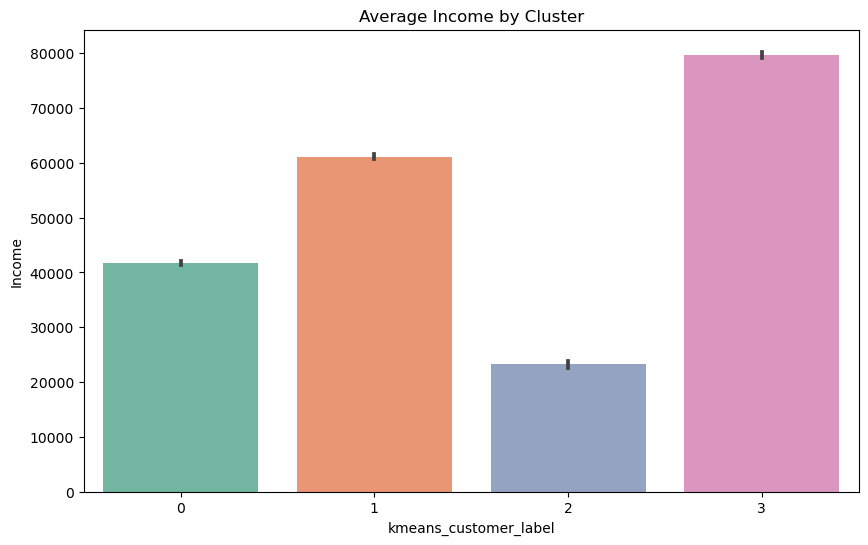

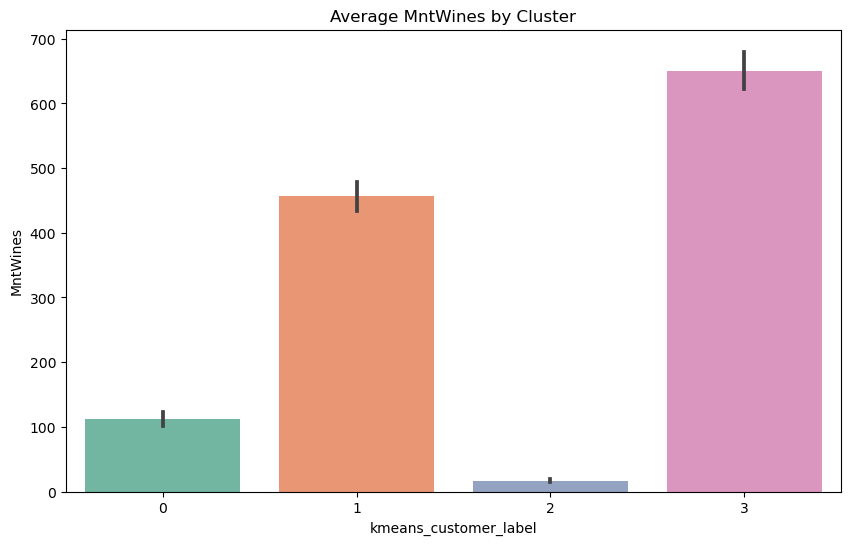

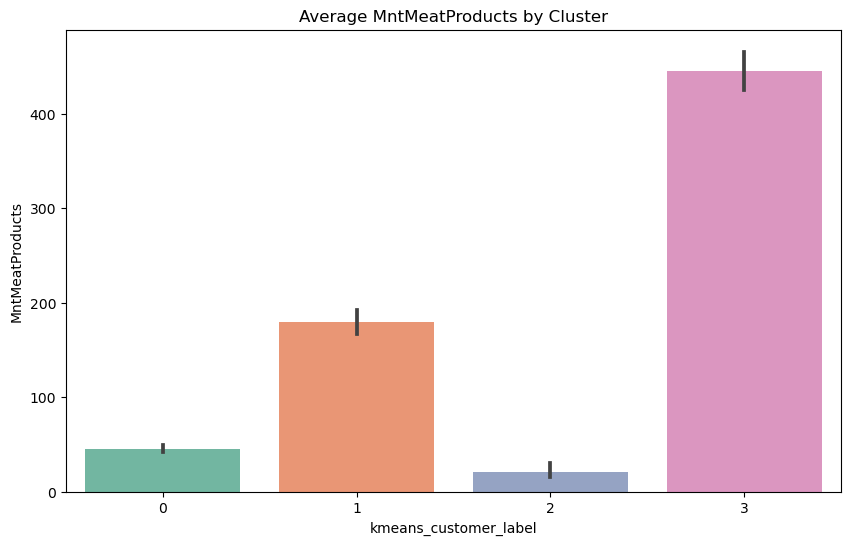

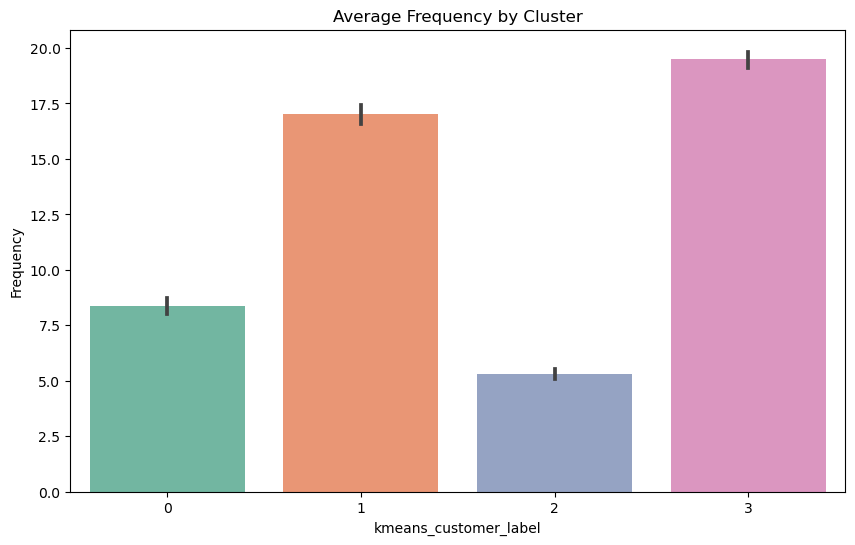

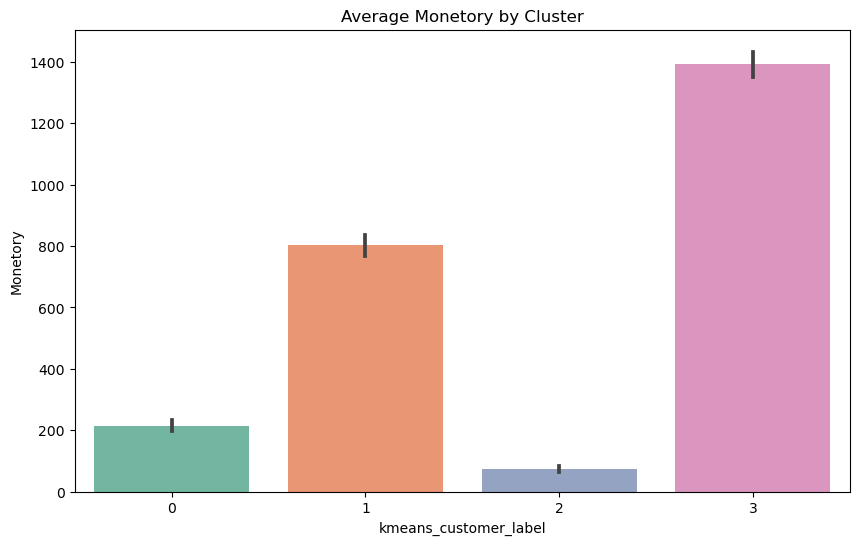

In [13]:
for column in ['Income', 'MntWines', 'MntMeatProducts', 'Frequency', 'Monetory']:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='kmeans_customer_label', y=column, data=data, palette='Set2')
    plt.title(f'Average {column} by Cluster')
    plt.show()

### Distribution Within Clusters 

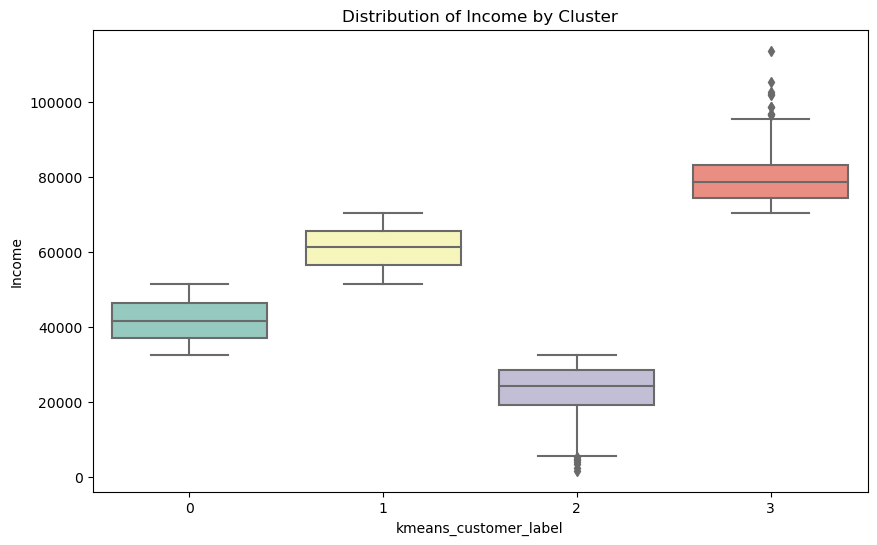

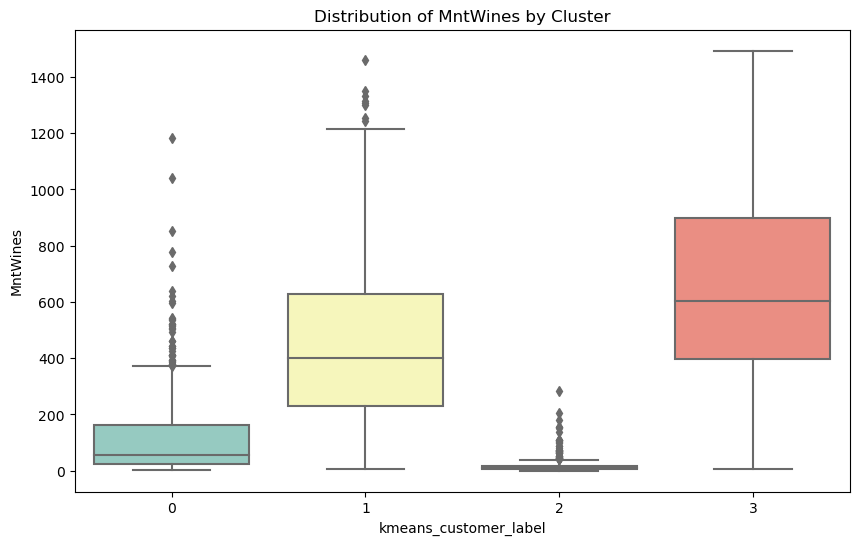

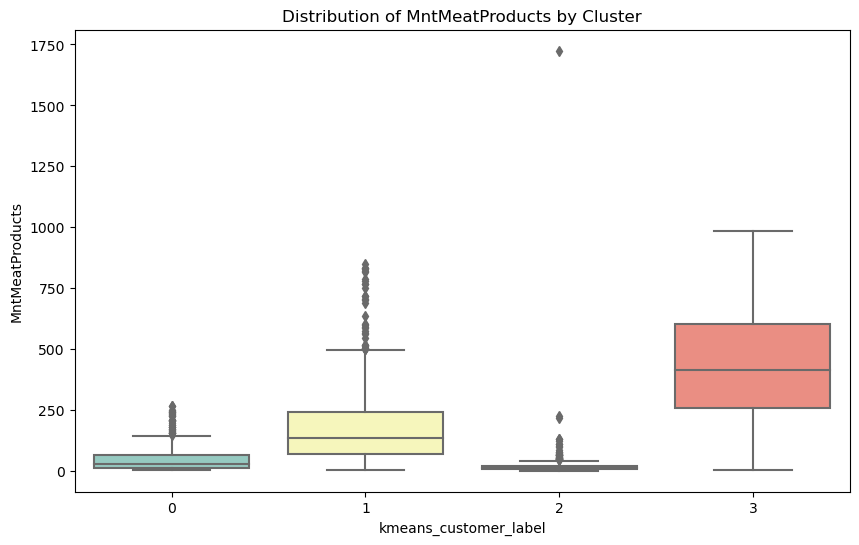

In [14]:
for column in ['Income', 'MntWines', 'MntMeatProducts']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='kmeans_customer_label', y=column, data=data, palette='Set3')
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

### Feature Importance 

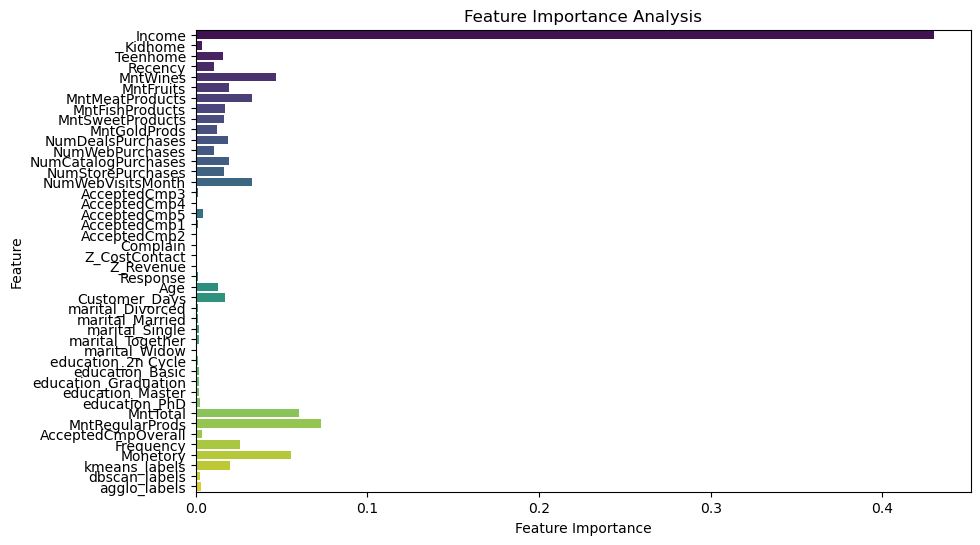

In [20]:
X = data.drop(['kmeans_customer_label'], axis=1)
y = data['kmeans_customer_label']

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

feature_importances = clf.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

Income, Kidhome, and Recency are significant drivers of cluster differentiation, which suggests that demographic factors and recent customer activity are important in segmenting customers.
Product spending (e.g., on wines, meats, and fish) also plays a key role in defining clusters, indicating that purchasing behavior is a strong segmentation factor.